Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cmath import nan
import plotly.express as px

#### _Load GDP per Capita database_

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
gdp_df = gdp_df.drop(columns="Value Footnotes").rename(columns={"Country or Area": "Country", "Value": "Gdp_Per_Capita"})

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7176 non-null   object 
 1   Year            7176 non-null   int64  
 2   Gdp_Per_Capita  7176 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 168.3+ KB


#### _Load the wages database_

In [5]:
wages = pd.read_csv('../data/Wages.csv', sep=',', skipfooter=146).drop(columns = 'Value Footnotes')

/tmp/ipykernel_138191/1036153830.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  wages = pd.read_csv('../data/Wages.csv', sep=',', skipfooter=146).drop(columns = 'Value Footnotes')


_Inspect the loaded wage database_

In [6]:
wages.tail(3)

,Country or Area,Year,Sex,Classification,Subclassification,Coverage,Scope,Source,SourceID,Value
3039,West Bank and Gaza Strip,1996,Total men and women,ISIC-Rev.3,Total.,Employees,Earnings per day,Labour force survey,# 0,46.27981
3040,West Bank and Gaza Strip,1996,Men,ISIC-Rev.3,Total.,Employees,Earnings per day,Labour force survey,# 0,47.59668
3041,West Bank and Gaza Strip,1996,Women,ISIC-Rev.3,Total.,Employees,Earnings per day,Labour force survey,# 0,39.64176


In [7]:
wages.head(3)

,Country or Area,Year,Sex,Classification,Subclassification,Coverage,Scope,Source,SourceID,Value
0,Andorra,2007,Total men and women,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1810.7
1,Andorra,2007,Men,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,2098.4
2,Andorra,2007,Women,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1480.9


In [8]:
wages.shape

(3042, 10)

_There are 3042 rows and 10 columns_

In [9]:
wages.describe()

,Year,Value
count,3042.000000,3.042000e+03
mean,1998.573964,6.120214e+04
std,7.108356,5.304966e+05
min,1969.000000,3.091000e-01
25%,1995.000000,7.264189e+01
50%,2000.000000,3.910000e+02
75%,2004.000000,3.437250e+03
max,2008.000000,1.958082e+07


_std is larger than mean_ 

_huge margin between min and max_

In [10]:
wages.dtypes

Country or Area       object
Year                   int64
Sex                   object
Classification        object
Subclassification     object
Coverage              object
Scope                 object
Source                object
SourceID              object
Value                float64
dtype: object

In [11]:
wages['Scope'].unique()

array(['Earnings per month', 'Earnings per hour', 'Earnings per week',
       'Wage rates per day', 'Wage rates per hour',
       'Wage rates per month', 'Earnings per day'], dtype=object)

In [12]:
wages['paid_by']=wages['Scope'].str.split(' ').str[-1].copy()

In [13]:
wages.head()

,Country or Area,Year,Sex,Classification,Subclassification,Coverage,Scope,Source,SourceID,Value,paid_by
0,Andorra,2007,Total men and women,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1810.7,month
1,Andorra,2007,Men,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,2098.4,month
2,Andorra,2007,Women,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1480.9,month
3,Andorra,2006,Total men and women,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1726.5,month
4,Andorra,2006,Men,ISIC-Rev.3,Total.,Employees,Earnings per month,Administrative records and related sources,# 0,1996.4,month


_Change the Scope of all rows to earnings per month_

In [14]:
wages_copy = wages.copy()

In [15]:
wages_copy.loc[wages_copy['paid_by'] == 'week', 'Value'] *= 4.33 
wages_copy.loc[wages_copy['paid_by'] == 'day', 'Value'] *= 173.333
wages_copy.loc[wages_copy['paid_by'] == 'hour', 'Value'] *= 1386.6667

Check to see if the values updated !!

In [16]:
wages_copy[wages_copy['paid_by']=='hour'].head(2)

,Country or Area,Year,Sex,Classification,Subclassification,Coverage,Scope,Source,SourceID,Value,paid_by
363,Canada,2008,Total men and women,ISIC-Rev.3,Total.,Wage earners,Earnings per hour,Labour-related establishment survey,# 0,27955.200672,hour
366,Canada,2007,Total men and women,ISIC-Rev.3,Total.,Wage earners,Earnings per hour,Labour-related establishment survey,# 0,27012.267316,hour


In [17]:
wages[wages['paid_by']=='hour'].head(2)

,Country or Area,Year,Sex,Classification,Subclassification,Coverage,Scope,Source,SourceID,Value,paid_by
363,Canada,2008,Total men and women,ISIC-Rev.3,Total.,Wage earners,Earnings per hour,Labour-related establishment survey,# 0,20.16,hour
366,Canada,2007,Total men and women,ISIC-Rev.3,Total.,Wage earners,Earnings per hour,Labour-related establishment survey,# 0,19.48,hour


In [42]:
wages_total = wages_copy[(wages_copy['Sex']=='Total men and women')]
wages_men = wages_copy[wages_copy['Sex']=='Men']
wages_women = wages_copy[wages_copy['Sex']=='Women']

In [43]:
wages_men = wages_men[['Country or Area','Year','Value','Source','Coverage','Classification','Subclassification','SourceID']].rename(columns={"Country or Area": "Country", "Value": "wages per month"})
wages_women = wages_women[['Country or Area','Year','Value','Source','Coverage','Classification','Subclassification','SourceID']].rename(columns={"Country or Area": "Country", "Value": "wages per month"})
wages_total = wages_total[['Country or Area','Year','Value','Source','Coverage','Classification','Subclassification','SourceID']].rename(columns={"Country or Area": "Country", "Value": "wages per month"})

Check out the wages_total database

In [44]:
wages_total.head()

,Country,Year,wages per month,Source,Coverage,Classification,Subclassification,SourceID
0,Andorra,2007,1810.7,Administrative records and related sources,Employees,ISIC-Rev.3,Total.,# 0
3,Andorra,2006,1726.5,Administrative records and related sources,Employees,ISIC-Rev.3,Total.,# 0
6,Andorra,2005,1624.0,Administrative records and related sources,Employees,ISIC-Rev.3,Total.,# 0
9,Andorra,2004,1542.9,Administrative records and related sources,Employees,ISIC-Rev.3,Total.,# 0
12,Andorra,2003,1458.5,Administrative records and related sources,Employees,ISIC-Rev.3,Total.,# 0


In [45]:
wages_total.dtypes

Country               object
Year                   int64
wages per month      float64
Source                object
Coverage              object
Classification        object
Subclassification     object
SourceID              object
dtype: object

In [46]:
wages_total['Country'].nunique()

92

There are 92 countries represented in the dataframe wages_total

<Axes: xlabel='Year'>

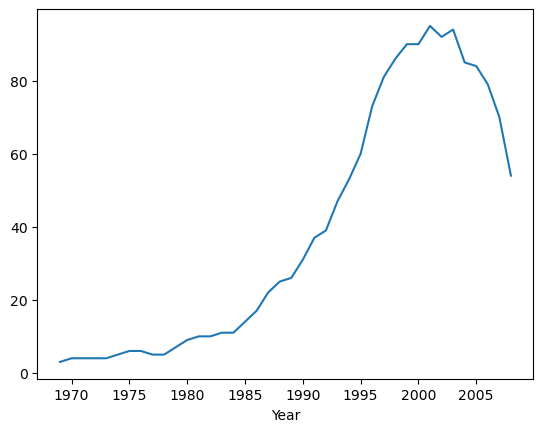

In [47]:
wages_total.groupby('Year')['Country'].count().plot()

In [48]:
wages_pivoted = pd.pivot_table(wages_total[(wages_total['Year']==2000) | (wages_total['Year']==1995)], index = ['Country'], values = 'wages per month',columns = ['Year'], dropna = True)

In [49]:
wages_pivoted = wages_pivoted.dropna()

In [50]:
wages_pivoted.head()

Year,1995,2000
Country,,
Armenia,7060.000000,22706.000000
Belarus,378072.200000,29501.700000
Botswana,878.000000,1593.000000
Brazil,578.870000,766.530000
Canada,11731.285418,12845.399358


In [51]:
wages_pivoted['Percent Change']= 100*(wages_pivoted[2000]-wages_pivoted[1995])/wages_pivoted[1995]

In [28]:
wages_pivoted['Percent Change'].sort_values()

Country
Tajikistan            -97.870041
Ukraine               -93.793745
Belarus               -92.196808
Italy                 -11.843137
Saint Helena           -0.786580
Sweden                  4.256150
Guam                    7.838983
Canada                  9.496947
Paraguay               10.909810
Mauritius              12.122418
Dominican Republic     13.692308
Seychelles             15.494904
United Kingdom         16.229803
Isle of Man            18.920089
Netherlands            19.675861
United States          20.446735
Brazil                 32.418332
Israel                 57.490724
Slovakia               58.860320
Czech Republic         59.696641
Colombia               68.094637
China                  70.383785
Slovenia               71.139148
Latvia                 72.131148
Botswana               81.435080
Guatemala              84.913590
Costa Rica             86.746797
Lithuania              94.608270
Estonia               106.610526
Hungary               119.716967
Cr

In [53]:
wages_trend = wages_total[((wages_total['Country']=='Uzbekistan')|(wages_total['Country']=='Romania')|(wages_total['Country']=='San Marino'))&(wages_total['Year'].between(1990,2000))]

<Axes: xlabel='Year', ylabel=' Wages Per Month'>

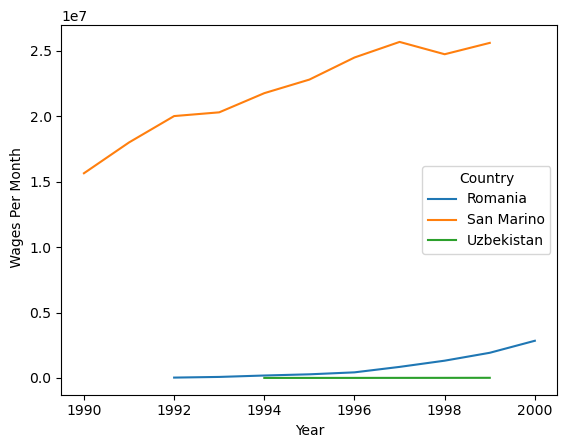

In [54]:
wages_trend_pivoted = pd.pivot_table(wages_trend, index = ['Year'], values = 'wages per month',columns = ['Country'], dropna = True)
wages_trend_pivoted.plot(ylabel= ' Wages Per Month')

Take United Kingdom and investigate men vs women's wage data 

In [55]:
wages_women.groupby('Country')['Year'].count()>30 

Country
Andorra                     False
Armenia                     False
Austria                     False
Azerbaijan                  False
Bahrain                     False
Belarus                     False
Bermuda                     False
Botswana                    False
Brazil                      False
Bulgaria                    False
Colombia                    False
Costa Rica                  False
Croatia                     False
Cyprus                       True
Egypt                       False
El Salvador                 False
France                      False
French Polynesia            False
Georgia                     False
Gibraltar                   False
Guadeloupe                  False
Hong Kong, China            False
Hungary                     False
Indonesia                   False
Isle of Man                 False
Kazakhstan                  False
Latvia                      False
Liechtenstein               False
Lithuania                   False
Macau,

In [74]:
wages_men_Cyprus = wages_men[wages_men['Country']=='Cyprus']
wages_women_Cyprus = wages_women[wages_women['Country']=='Cyprus']
wages_total_Cyprus = wages_total[wages_total['Country']=='Cyprus']

In [76]:
wages_women_Cyprus['Source'].unique()

array(['Labour-related establishment survey'], dtype=object)

In [77]:
wages_women_Cyprus['Coverage'].unique()

array(['Employees', 'Wage earners', 'Salaried employees'], dtype=object)

In [79]:
wages_women_Cyprus.head()

,Country,Year,wages per month,Source,Coverage,Classification,Subclassification,SourceID
593,Cyprus,2006,8195.200197,Labour-related establishment survey,Employees,ISIC-Rev.3,Total.,# 0
594,Cyprus,2006,5213.866792,Labour-related establishment survey,Wage earners,ISIC-Rev.3,Total.,# 0
595,Cyprus,2006,618.453900,Labour-related establishment survey,Wage earners,ISIC-Rev.3,Total.,# 0
596,Cyprus,2006,1034.730000,Labour-related establishment survey,Salaried employees,ISIC-Rev.3,Total.,# 0
605,Cyprus,2005,1003.150000,Labour-related establishment survey,Salaried employees,ISIC-Rev.3,Total.,# 0


In [80]:
px.strip(wages_women_Cyprus, x = 'Year', y = 'wages per month',color = 'Coverage',hover_name= 'Country')

In [81]:
wages_total_Cyprus = wages_total_Cyprus[wages_total_Cyprus['Coverage']=='Salaried employees']
wages_men_Cyprus = wages_men_Cyprus[wages_men_Cyprus['Coverage']=='Salaried employees']
wages_women_Cyprus = wages_women_Cyprus[wages_women_Cyprus['Coverage']=='Salaried employees']

In [82]:
px.strip(wages_women_Cyprus, x = 'Year', y = 'wages per month',color = 'Coverage',hover_name= 'Country')

In [92]:
wages_women_Cyprus.head()

,Country,Year,wages per month,Source,Coverage,Classification,Subclassification,SourceID
596,Cyprus,2006,1034.73,Labour-related establishment survey,Salaried employees,ISIC-Rev.3,Total.,# 0
605,Cyprus,2005,1003.15,Labour-related establishment survey,Salaried employees,ISIC-Rev.3,Total.,# 0
620,Cyprus,2004,956.87,Labour-related establishment survey,Salaried employees,ISIC-Rev.3,Total.,# 0
629,Cyprus,2003,933.30,Labour-related establishment survey,Salaried employees,ISIC-Rev.3,Total.,# 0
644,Cyprus,2002,875.02,Labour-related establishment survey,Salaried employees,ISIC-Rev.3,Total.,# 0


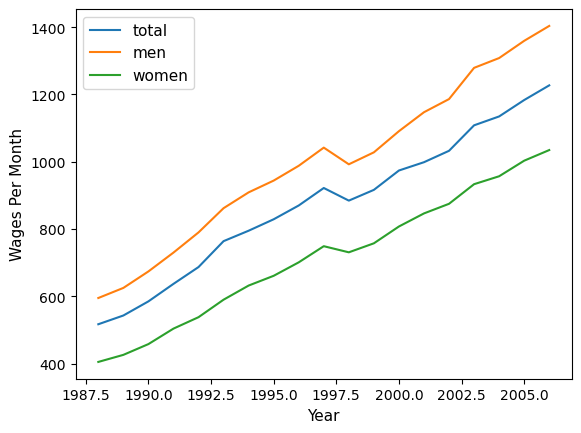

In [87]:

fig, ax1 = plt.subplots()

ax1.xaxis.label.set_fontsize(10)
ax1.yaxis.label.set_fontsize(10)
ax1.tick_params(axis='both', which='both', labelsize=10)
ax1.plot(wages_total_Cyprus['Year'],wages_total_Cyprus['wages per month'], markersize = 4, markeredgewidth = 0.4, label = 'total')

ax1.plot(wages_men_Cyprus['Year'],wages_men_Cyprus['wages per month'], markersize = 4, markeredgewidth = 0.4, label = 'men')

ax1.plot(wages_women_Cyprus['Year'],wages_women_Cyprus['wages per month'], markersize = 4, markeredgewidth = 0.4, label = 'women')

plt.xlabel('Year', fontsize= 11)
plt.ylabel('Wages Per Month',fontsize=11)

plt.legend(fontsize=11)



In [88]:
gdp_wage = pd.merge(gdp_df, wages_total, on = ['Country','Year'], how = 'inner')

In [89]:
gdp_wage[['Gdp_Per_Capita','wages per month']].corr()

,Gdp_Per_Capita,wages per month
Gdp_Per_Capita,1.000000,0.108454
wages per month,0.108454,1.000000


In [90]:
px.density_heatmap(gdp_wage, x = 'Country', y = 'Year', z='Gdp_Per_Capita',histfunc = 'avg')

<Axes: xlabel='Country'>

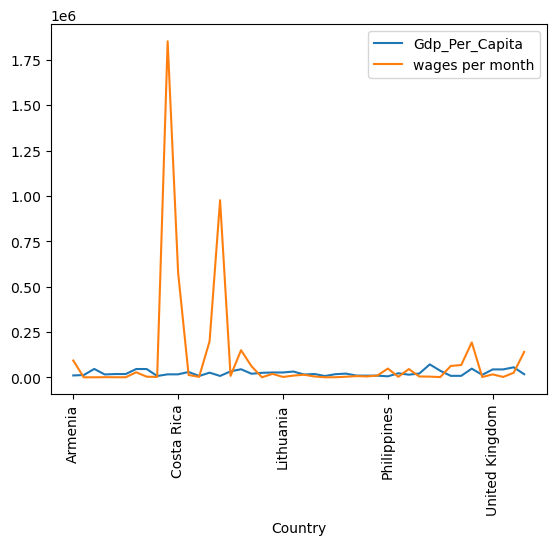

In [91]:
gdp_wage_2008 = gdp_wage[gdp_wage['Year']==2008]
gdp_wage_2008.plot(x='Country',y=['Gdp_Per_Capita', 'wages per month'],rot=90)
# sns.lineplot(gdp_wage_2008, x= 'Country', y = 'wages per month')